# CS273A Homework 6

## Due: Friday, December 5th, 2025

---
## Instructions


This homework (and many subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.


Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to use these starter Jupyter notebooks to complete your assignment and to write your report. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or Latex to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: Clustering Iris Data (55 points)
    - Problem 1.1: Data Points (5 points)
    - Problem 1.2: K-Means Clustering (15 points)
    - Problem 1.3: K-Means++ Initialization (10 points)
    - Problem 1.4: Selecting a Clustering (5 points)
    - Problem 1.5: Agglomerative Clustering (15 points)
    - Problem 1.5: Analysis (5 points)
- Problem 2: Dimensionality Reduction (40 points)
    - Problem 2.1: Preprocessing (5 points)
    - Problem 2.2: Eigendecomposition (10 points)
    - Problem 2.3: Reconstruction (10 points)
    - Problem 2.4: Visualizing (5 points)
    - Problem 2.5: Nonlinear & Implicit Embeddings (10 points)
- Statement of Collaboration (5 points)

Before we get started, let's import some libraries that you will make use of in this assignment. Make sure that you run the code cell below in order to import these libraries.

**Important: In the code block below, we set `seed=1234`. This is to ensure your code has reproducible results and is important for grading. Do not change this. If you are not using the provided Jupyter notebook, make sure to also set the random seed as below.**

**Important: Do not change any codes we give you below, except for those waiting for you to complete. This is to ensure your code has reproducible results and is important for grading.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import requests                                      # reading data
from io import StringIO

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.inspection import DecisionBoundaryDisplay

plt.set_cmap('nipy_spectral');

import scipy.linalg

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

<Figure size 640x480 with 0 Axes>

--- 
## Problem 1: Clustering

In this problem you will experiment with two clustering algorithms implemented in ``scikit-learn``: k-means and agglomerative clustering. 

Let's also load in some data that we will use for the tests in Problem 1. Here, we are using the Iris dataset, where we're only using the first two features. Although you typically would split your data into a training set and a testing set, we won't do that here because we are only using this data to illustrate clustering.

In [2]:
# Load the Iris dataset
X, y = load_iris(return_X_y = True)
# Only use the first two features
X = X[:, :2]

### Problem 1.1: Data Points (10 points):
First, plot the Iris data features ``X``, and see how "clustered" you think it looks.  How many clusters do you think there should be for these data?

Based on visual inspection, I think there are 3 clusters in the Iris dataset. One cluster appears to be well-separated towards the top left, while the other larger cluster is towards the botton right to left, but it seems to have some sub-structure that could indicate additional clusters within it.


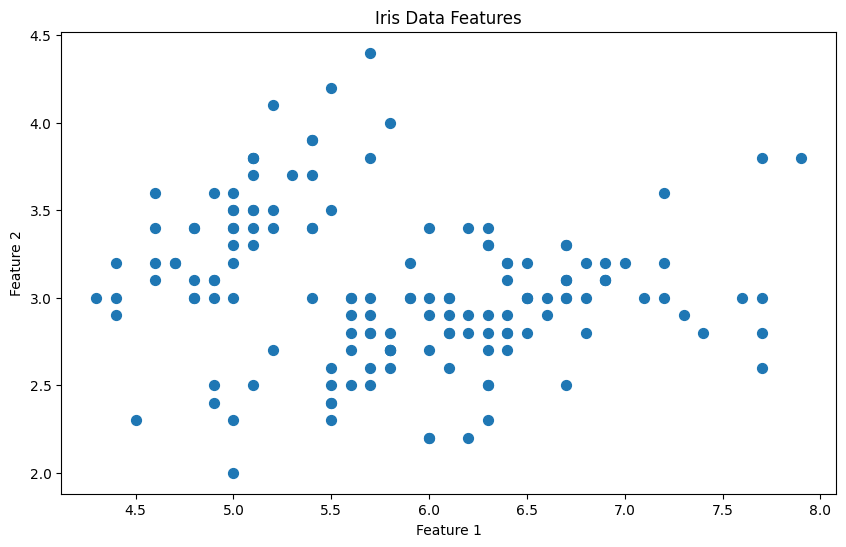

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Iris Data Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# How many clusters?
print("Based on visual inspection, I think there are 3 clusters in the Iris dataset. One cluster appears to be well-separated towards the top left, " \
"while the other larger cluster is towards the botton right to left, but it seems to have some sub-structure that could indicate additional clusters within it.")

### Problem 1.2: K-Means Clustering (15 points):
Run k-means clustering on the data ``X``, for several choices of $k$: $k \in \{2,5,20\}$.  Use the basic ``random`` initialization.  *Manually* fit at least 5 different initializations followed by the k-means algorithm (i.e., run the function ``.fit(X)`` at least 5 times with different random seeds), and for each one, check and compare their cluster quality (either visually by plotting, or by comparing the total distortion via ``score``).  

*Note:* it is not usually helpful to compare the cluster labels assigned to the data, since the identity of the each cluster (its index, $0\ldots k-1$) is not important -- only which data have been assigned to the same cluster.

k=2, init=4, distortion=58.20
k=5, init=4, distortion=21.00
k=20, init=4, distortion=4.51


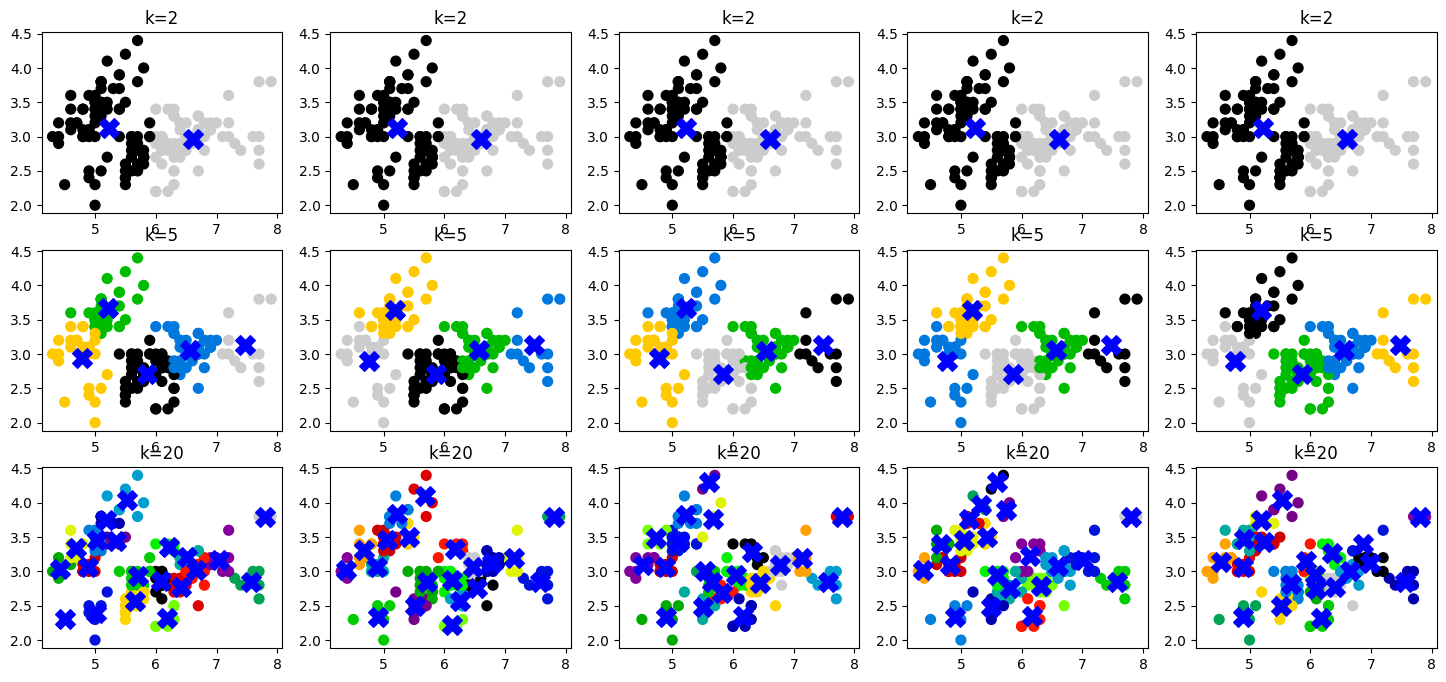

In [ ]:
fig, ax = plt.subplots(3,5, figsize=(18,8))

for j,k in enumerate([2,5,20]):
    for i in range(5):
        # use random_state = seed*k + i
        clust = KMeans(n_clusters=k, init='random', random_state=seed*k + i)
        clust.fit(X)

        ax[j,i].scatter(X[:, 0], X[:, 1], c=clust.labels_, s=50)
        ax[j,i].scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], c='blue', s=200, marker='X')
        ax[j,i].set_title(f'k={k}')
        
        score = -clust.score(X)
    print(f'k={k}, init={i}, distortion={score:.2f}')

### Problem 1.3: K-Means++ Initialization (10 points):
Run a single initialization and fit using the ``k++`` initialization technique.  Compare the resulting clustering to those in the previous problem, both visually and by score.

k=2 (k-means++), distortion=58.45
k=5 (k-means++), distortion=26.06
k=20 (k-means++), distortion=4.30


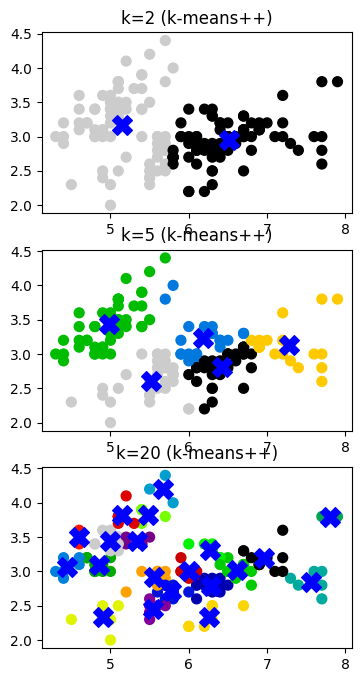

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(4,8))
results = {} # to store results

for j,k in enumerate([2,5,20]):
    for i in range(1):
        # again, use random_state = seed*k + i
        # apply k-means++ initialization
        clust = KMeans(n_clusters=k, init='k-means++', random_state=seed*k + i)
        clust.fit(X)

        # storing the clustering result for comparison
        results[k] = { 'labels': clust.labels_, 'centers': clust.cluster_centers_, 'score': -clust.score(X) }

        # plotting
        ax[j].scatter(X[:, 0], X[:, 1], c=clust.labels_, s=50)
        ax[j].scatter(clust.cluster_centers_[:, 0], clust.cluster_centers_[:, 1], c='blue', s=200, marker='X')
        ax[j].set_title(f'k={k} (k-means++)')
    
    print(f'k={k} (k-means++), distortion={results[k]["score"]:.2f}')

# Comparition
# The score for k-means++ initialization is generally higher (better) than the scores obtained with random initialization.

### Problem 1.4: Selecting a Clustering (5 points):
Select the best clustering (by ``score``) and display the data (``scatter``) colored by their cluster membership, along with the cluster centers (as ``X`` markers).  (You can get the closest assigned cluster via ``predict``.)

Best distortion for k=20: 4.26


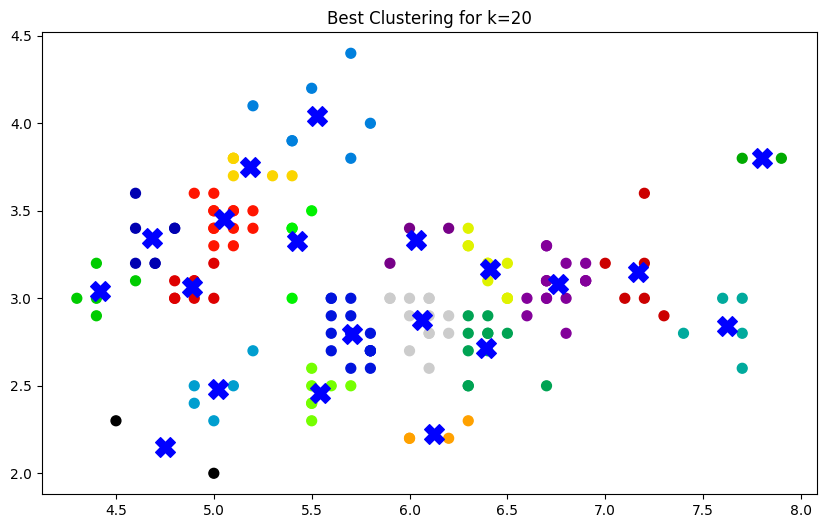

In [ ]:
k_values = [2,5,20]
best_results = {}
for k in k_values:
    best_score = float('inf')
    best_clust = None
    # trying 10 different initializations
    for i in range(10):
        clust = KMeans(n_clusters=k, init='k-means++', random_state=seed*k + i)
        clust.fit(X)
        score = -clust.score(X)
        if score < best_score:
            best_score = score
            best_clust = clust
    best_results[k] = best_clust

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_clust.labels_, s=50)
plt.scatter(best_clust.cluster_centers_[:, 0], best_clust.cluster_centers_[:, 1], c='blue', s=200, marker='X')
plt.title(f'Best Clustering for k={k}')
print(f'Best distortion for k={k}: {-best_clust.score(X):.2f}')

As a note, clustering that can be extended to out-of-sample points, such as k-means, can provide a useful construction of additional features for downstream supervised learning.  The ``transform`` function in the k-means class uses distance to the various clusters as a feature transform, which can replace or augment the original features for a learner.

### Problem 1.5: Agglomerative Clustering (15 points)

Now use heirarchical aggolomerative clustering to find groupings of the data into 5 clusters (the middle value from the k-means exercise), under different definitions of the "cluster distance": ``single`` linkage (nearest pair of points), ``ward`` (mean distance, distance between the means of the clusters), and ``complete`` linkage (furthest pair of points).  Use the usual Euclidean distance as the dissimilarity metric (``metric = 'euclidean'``).


Note that, unlike k-means, the agglomerative clustering procedure is not easily applied to out-of-sample points, meaning that, given a new location $x$, it is not always clear which cluster it should belong to.  (In k-means, we can simply select the nearest cluster center.)  In ``sklearn``, this is reflected in the fact that there is no ``predict`` function (to apply the learned clustering to out-of-sample data points); you can access the cluster assignments of the data used during clustering as ``labels_``, or call ``fit_predict`` (which fits and provides the prediction on the data used for fitting).

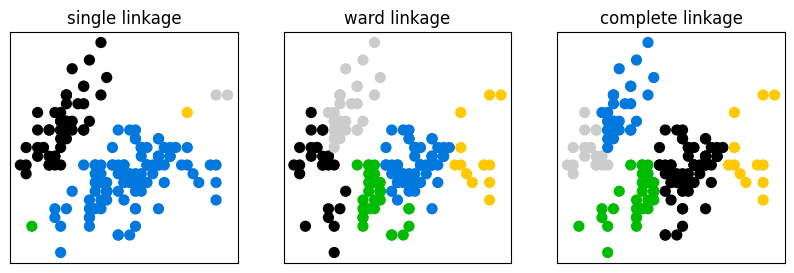

In [35]:
linkages = ['single', 'ward', 'complete']
fig, ax = plt.subplots(1,3, figsize=(10,3))

for j,linkage in enumerate(linkages):
    agglom = AgglomerativeClustering(n_clusters=5, linkage=linkage, metric='euclidean')
    labels = agglom.fit_predict(X)

    ax[j].scatter(X[:, 0], X[:, 1], c=labels, s=50)
    ax[j].set_title(f'{linkage} linkage')
    ax[j].set_xticks([])
    ax[j].set_yticks([])

### Problem 1.6: Analysis (5 points)

**Compare** the results of the three clusterings you obtained via agglomerative clustering to the clusterings you obtained from k-means.  Do any seem better, or worse, and why?

**Why** do we not run agglomerative clustering multiple times, as we did with k-means?

The agglomerative clustering results vary based on the linkage method used. The 'ward' linkage seems to be the most similar to the k-means results, while 'single' and 'complete' linkages produce different cluster shapes. 

We do not run agglomerative clustering multiple times because it is a deterministic algorithm, meaning that given the same input data and parameters, it will always produce the same clustering result. IT does not rely on random initialization like k-means.

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

## Problem 2: Dimensionality Reduction


In this problem, we will use the MNIST dataset to do a little exploration of PCA representations for smoothing or compressing high-dimensional data.  First, let's load MNIST:

In [36]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
from sklearn.datasets import fetch_openml            # common data set access
X_mnist, y_mnist = fetch_openml('mnist_784', as_frame=False, return_X_y=True)
p = 28                                               # WxH for mnist data

# Convert labels to integer data type
y_mnist = y_mnist.astype(int)

Let's first just keep the data corresponding to the digits "3":

In [37]:
X,y = X_mnist[y_mnist==3], y_mnist[y_mnist==3]

There are 7141 threes, sized 28x28 = 784 pixels each.

As in our earlier homework, we can display the images using ``imshow``; since the images are grayscale only, we use a gray colormap. and specify the range of values in that colormap (``vmin, vmax``) so that the contrast is not adjusted automatically in the display function.  For example, we can look at five data points:

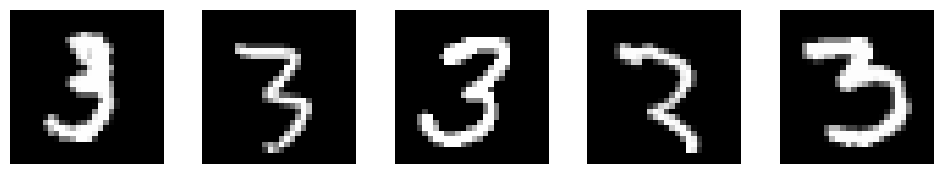

In [38]:
fig,ax = plt.subplots(1,5, figsize=(12,2));
for a,i in enumerate([1,5,30,50,100]):
    ax[a].imshow(X[i,:].reshape(p,p), cmap="gray", vmin=0,vmax=255); 
    ax[a].axis('off')

### Problem 2.1: Preprocessing (5 points)

First, find the "mean three" (average over the 7000 threes), and display it.  Remove this mean vector from the data to obtain a zero-centered data set ``XO``:

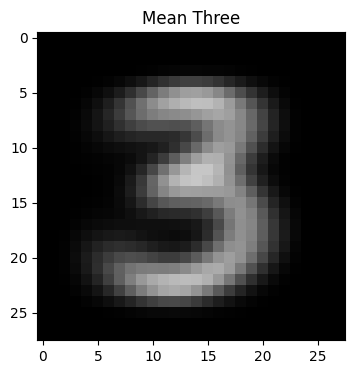

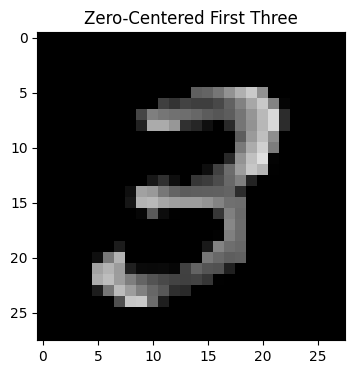

In [ ]:
mean_three = np.mean(X, axis=0)

# display the mean three
plt.figure(figsize=(4,4))
plt.imshow(mean_three.reshape(p,p), vmin=0,vmax=255, cmap='gray')
plt.title("Mean Three")
plt.show()

XO = X - mean_three

plt.figure(figsize=(4,4))
plt.imshow(XO[0,:].reshape(p,p), vmin=0,vmax=255, cmap='gray')
plt.title("Zero-Centered First Three")
plt.show()

### Problem 2.2: EigenDecomposition (10 points)

Now, use ``scipy.linalg.svd`` to compute the singular value decomposition,
$$ X0 = U \odot S \odot V^T = Z \odot V^T$$
where $U$, $V^T$ are unitary (orthogonal) matrices, so that $U \odot U^T = V^T \odot V = I$, and $S$ is diagonal.

(Note that ``svd`` returns $V^T$ as an output, rather than $V$.)

We define $Z=U \odot S$ for convenience.

In [ ]:
U, S, VT = scipy.linalg.svd(XO, full_matrices=False)
Z = U * S

print(f'Shape of U: {U.shape}')
print(f'Shape of S: {S.shape}')
print(f'Shape of VT: {VT.shape}')
print(f'Shape of Z: {Z.shape}')

Shape of U: (7141, 784)
Shape of S: (784,)
Shape of VT: (784, 784)
Shape of Z: (7141, 784)


### Problem 2.3: Reconstructions (10 points)
Compute the reconstruction of digits 5 and 33 using only the top $k$ eigenvectors, where $k \in \{1,5,15,50,100\}$.  For each reconstruction, what is the distortion (mean squared error between the pixels in the original image $x^{(i)}$ and the reconstructed image $\hat x^{(i)}$)?

Reconstruction of digit 5 with k=2: MSE = 1966.35
Reconstruction of digit 5 with k=5: MSE = 1782.22
Reconstruction of digit 5 with k=15: MSE = 1148.15
Reconstruction of digit 5 with k=50: MSE = 563.49
Reconstruction of digit 5 with k=100: MSE = 233.53
Reconstruction of digit 33 with k=2: MSE = 1676.68
Reconstruction of digit 33 with k=5: MSE = 1282.16
Reconstruction of digit 33 with k=15: MSE = 721.98
Reconstruction of digit 33 with k=50: MSE = 395.10
Reconstruction of digit 33 with k=100: MSE = 161.84


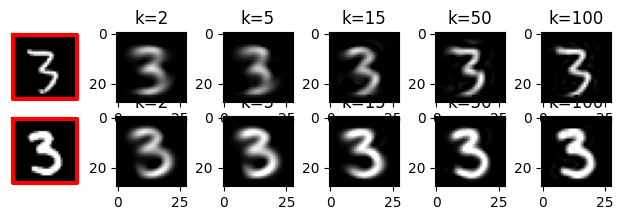

In [ ]:
# Reconstruct two digits using a few components
fig,ax = plt.subplots(2,6, figsize=(8,2)); 
for ii,i in enumerate([5,33]):
    ax[ii,0].imshow(X[i,:].reshape(p,p), cmap="gray",vmin=0,vmax=255)  # plot & 
    ax[ii,0].axis('off')
    ax[ii,0].plot([-1,-1,p,p,-1],[-1,p,p,-1,-1],'r-',lw=3)                  # highlight "original" data    
    for j,k in enumerate([2,5,15,50,100]):
        # YOUR CODE GOES HERE
        Z_k = U[:, :k] * S[:k]
        X_hat = np.dot(Z_k, VT[:k, :]) + mean_three  # Reconstruct the images

        ax[ii,j+1].imshow(X_hat[i,:].reshape(p,p), cmap="gray",vmin=0,vmax=255)
        ax[ii,j+1].set_title(f'k={k}')

        # Mean Squared Error
        mse = np.mean((X[i,:] - X_hat[i,:])**2)
        print(f'Reconstruction of digit {i} with k={k}: MSE = {mse:.2f}')
plt.show()

### Problem 2.4: Visualizing the latent space (5 points)

We can create a scatterplot of the digits in their latent position $z$ (the rows of the matrix $Z$ in SVD, or just $U$ if you want to remove the scaling effect of $S$) to visualize how the data change across the space.  **Run** the following (provided) code to do so, and **comment on the  axes found** for the layout of images. (For example, the first axis should look like a rotation, or the "slant" of the digit -- why does this make sense?)

(-2.0, 2.0, -2.0, 2.0)

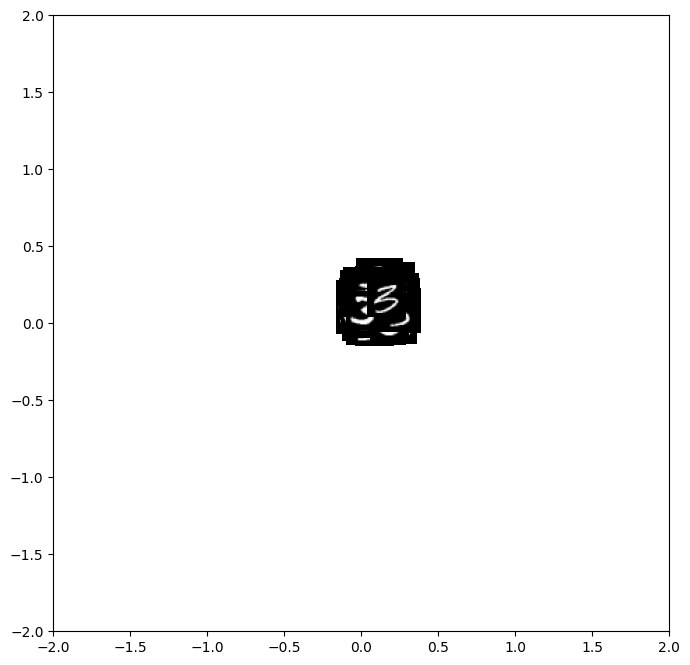

In [58]:
# Let's plot some of the digits and see what the first two dimensions look like... 
np.random.seed(1234)
idx = np.floor( len(X)*np.random.rand(100) ).astype('int')
plt.figure(figsize=(8,8))

scale = 0.08/np.std(U[:, :2])

for i in idx:
    loc = (scale*U[i,0],scale*U[i,0]+.25, scale*U[i,1],scale*U[i,1]+.25)
    plt.imshow(np.reshape(X[i,:],(p,p)) , cmap="gray", extent=loc , vmin=0,vmax=255)

plt.axis( (-2,2,-2,2) )

### Problem 2.5 Nonlinear & Implicit Embeddings (10 points)

While PCA is fast and relatively easy to understand, high dimensional data often does not fall nicely within a small linear vector subspace.  As discussed in class, one option is to train a nonlinear autoencoder, which replaces the linear projection operations in PCA with a nonlinear function.  But, another option is to simply optimize directly over the latent locations $z^{(i)}$ of each data point $i$, which defines an implicit embedding (i.e., we do not know the function that maps $x$ to $z$, just its values at the data points).  To do this, we must define a "loss" which accounts for whether the locations $z^{(i)}$ "match" the original data $x^{(i)}$.  We'll compare the PCA embedding with a particular implicit embedding called TSNE.

**Note**: this problem doesn't really require you to solve anything; just perform the embeddings and interpret their results.

In [59]:
# First, let's grab a few more digits of MNIST:
X,y = X_mnist[y_mnist<=3], y_mnist[y_mnist<=3]

np.random.seed(1234)
idx = np.floor( len(X)*np.random.rand(150) ); # pick some data
idx = idx.astype('int')

#### PCA representation of 0..3:
First, use PCA to reduce the images to two dimensions.  For convenience we'll just use ``sklearn`` for this here:

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
Z = pca.transform(X)

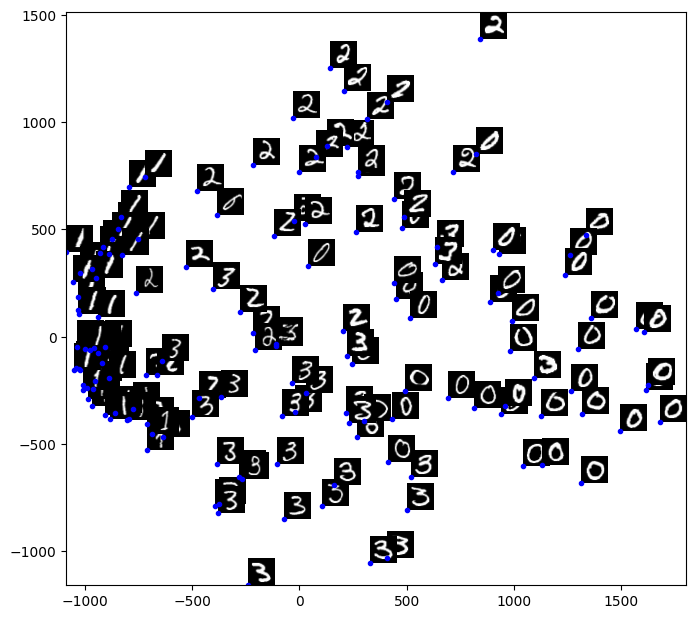

In [61]:
plt.figure(figsize=(8,8))

scale = 500   # need to choose an appropriate scale, compare to the axes & "extent" used for the image display

for i in idx:
    loc = (Z[i,0],Z[i,0]+scale*.25, Z[i,1],Z[i,1]+scale*.25)
    plt.imshow(np.reshape(X[i,:],(p,p)) , cmap="gray", extent=loc , vmin=0,vmax=255);
    plt.plot(loc[0],loc[2],'b.')
    #plt.axis( (-1,1,-1,1) )
    
plt.show()

#### TSNE nonlinear embedding of 0..3:
Next, use TSNE to embed the same data.  This will be **much** slower, but instead of simply finding a linear subspace, will place the data at positions $z$ to preserve their relative "similarity".  (You can see the TSNE page or the course notes for more precise details.)  The ``perplexity`` parameter effectively determines the neighborhood size of this similarity comparison; it has a significant effect on the results and can be hard to set automatically.

In [62]:
# Computationally intensive, "nonlinear" embedding...
from sklearn.manifold import TSNE

# Note: this can be a bit slow!
embedding = TSNE(n_components=2, learning_rate='auto', init='pca', verbose=1, perplexity=10)
Z = embedding.fit_transform(X)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 28911 samples in 0.016s...
[t-SNE] Computed neighbors for 28911 samples in 21.487s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28911
[t-SNE] Computed conditional probabilities for sample 2000 / 28911
[t-SNE] Computed conditional probabilities for sample 3000 / 28911
[t-SNE] Computed conditional probabilities for sample 4000 / 28911
[t-SNE] Computed conditional probabilities for sample 5000 / 28911
[t-SNE] Computed conditional probabilities for sample 6000 / 28911
[t-SNE] Computed conditional probabilities for sample 7000 / 28911
[t-SNE] Computed conditional probabilities for sample 8000 / 28911
[t-SNE] Computed conditional probabilities for sample 9000 / 28911
[t-SNE] Computed conditional probabilities for sample 10000 / 28911
[t-SNE] Computed conditional probabilities for sample 11000 / 28911
[t-SNE] Computed conditional probabilities for sample 12000 / 28911
[t-SNE] Computed conditional probabilities for sa

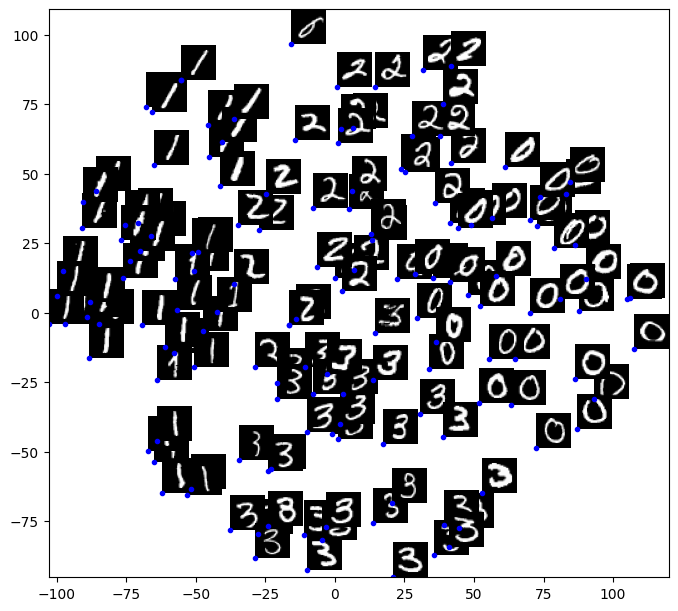

In [63]:
np.random.seed(1234)
idx = np.floor( len(X)*np.random.rand(150) ); # pick some data
idx = idx.astype('int')

plt.figure(figsize=(8,8))

scale = 50.   # need to choose an appropriate scale, compare to the axes & "extent" used for the image display

for i in idx:
    loc = (Z[i,0],Z[i,0]+scale*.25, Z[i,1],Z[i,1]+scale*.25)
    plt.imshow(np.reshape(X[i,:],(p,p)) , cmap="gray", extent=loc , vmin=0,vmax=255);
    plt.plot(loc[0],loc[2],'b.')
    #plt.axis( (-1,1,-1,1) )
    
plt.show()

Compare the two embeddings (PCA vs TSNE).  How are they similar? How do they differ?  Why might this be the case? (The differences are even more pronounced if you keep all 10 digits; try it if you like.)

Both PCA and t-SNE aim to reduce the dimensionality of the data while preserving its structure.
However, PCA is a linear method that captures global variance, while t-SNE is a nonlinear method that focuses on preserving local relationships.

Why does TSNE only have a ``fit_transform`` function, while PCA has separate ``fit`` and ``transform`` functions?

TSNE is used for nonlinear dimensionality reduction and embedding, it does not learn a linear mapping from high-dimensional space to low-dimensional space like PCA does. 
Therefore, TSNE does not have a separate transformation step after fitting, as the embedding is directly computed during the fitting process.

<div>
    <img src="data:image/svg+xml,%3C%3Fxml%20version%3D%221.0%22%20encoding%3D%22UTF-8%22%20standalone%3D%22no%22%3F%3E%0A%3C%21DOCTYPE%20svg%20PUBLIC%20%22-//W3C//DTD%20SVG%201.1//EN%22%20%22http%3A//www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd%22%3E%0A%3Csvg%20stroke-miterlimit%3D%2210%22%20style%3D%22fill-rule%3Anonzero%3Bclip-rule%3Aevenodd%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Around%3B%22%20version%3D%221.1%22%20viewBox%3D%220%200%20288%2072%22%20xml%3Aspace%3D%22preserve%22%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%20xmlns%3Axlink%3D%22http%3A//www.w3.org/1999/xlink%22%3E%0A%3Cdefs/%3E%0A%3Cg%20id%3D%22Layer-1%22%3E%0A%3Cpath%20d%3D%22M34.042%2035.8741C45.8469%2023.244%2031.1794%2022.6473%2024.2857%2024.1167C17.3921%2025.5861-0.960215%2033.2987%206.07817%2043.4256C13.1166%2053.5525%2023.0237%2056.9377%2052.2446%2053.4091C81.4656%2049.8804%2097.2436%2032.811%20122.962%2029.3111C148.681%2025.8112%20155.118%2039.4093%20155.118%2039.4093%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3Cpath%20d%3D%22M254.053%2040.6889C242.328%2053.1071%20256.999%2053.6247%20263.883%2052.1549C270.768%2050.685%20289.071%2043.0512%20281.969%2033.1691C274.868%2023.287%20264.94%2020.0179%20235.741%2023.6051C206.543%2027.1922%20190.872%2043.9744%20165.176%2047.5176C139.48%2051.0607%20132.957%2037.7776%20132.957%2037.7776%22%20fill%3D%22none%22%20opacity%3D%221%22%20stroke%3D%22%23000000%22%20stroke-linecap%3D%22butt%22%20stroke-linejoin%3D%22round%22%20stroke-width%3D%223%22/%3E%0A%3C/g%3E%0A%3C/svg%3E%0A" width="200"/>
</div>

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed. If you did not collaborate with anyone, you should write something like "I completed this assignment without any collaboration."

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

I have not collaborated with anyone on this assignment.

I am also extremely sorry for submitting this and some of the earlier assignments late. I had this one almost done, but decided to focus and study for the final before finishing it, and previously, I couldn't manage my time properly and had to prioritize some other work before finishing the homework.